In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.ticker import MultipleLocator
#import seaborn as sns
import networkx as nx

               dms_orig          dms_dest               sctg2  \
0     011-Birmingham AL        01-Alabama  21-Pharmaceuticals   
1     011-Birmingham AL        01-Alabama  21-Pharmaceuticals   
2     011-Birmingham AL         02-Alaska  21-Pharmaceuticals   
3     011-Birmingham AL        04-Arizona  21-Pharmaceuticals   
4     011-Birmingham AL        04-Arizona  21-Pharmaceuticals   
...                 ...               ...                 ...   
8059        560-Wyoming  54-West Virginia  21-Pharmaceuticals   
8060        560-Wyoming      55-Wisconsin  21-Pharmaceuticals   
8061        560-Wyoming      55-Wisconsin  21-Pharmaceuticals   
8062        560-Wyoming        56-Wyoming  21-Pharmaceuticals   
8063        560-Wyoming        56-Wyoming  21-Pharmaceuticals   

                       dms_mode  thousand tons in 2017  thousand tons in 2018  \
0                       1-Truck                79.8276                75.7832   
1       5-Multiple modes & mail                 5.7772   

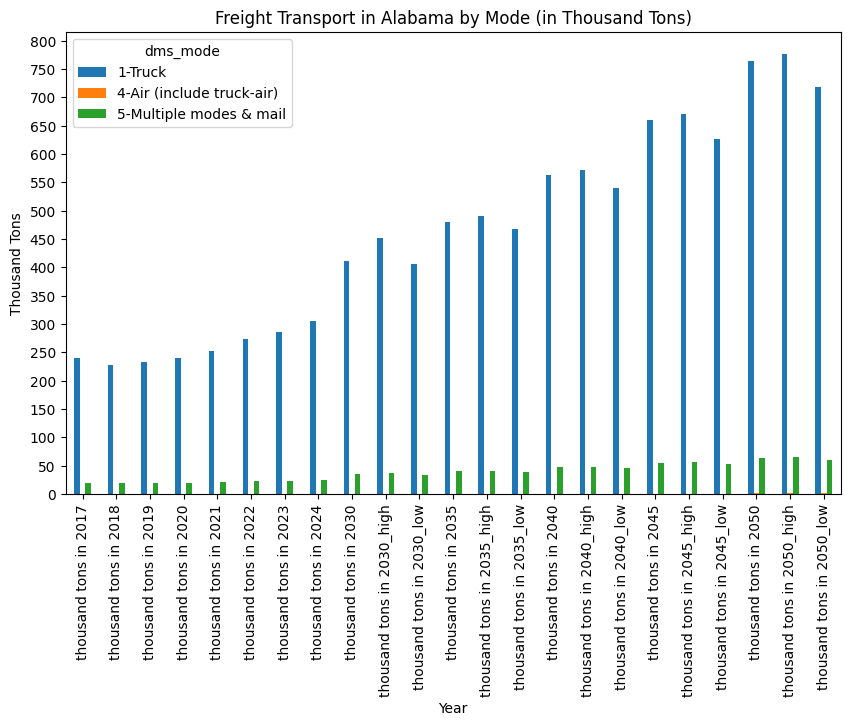

In [3]:
df1=pd.read_csv("Dataset1.csv")
print(df1)

df1.columns.values # checking the columns
df1.shape # checking the shape of the dataset
df2=df1[(df1['dms_dest']=="01-Alabama")]

for col in df2.columns:
    if pd.api.types.is_numeric_dtype(df2[col]):
       print(f"{col}: {df2[col].sum()}\n")

#groupby pandas. Each state is display

year_columns = [col for col in df2.columns if col.startswith('thousand tons in')]
all_years = df2.groupby('dms_mode')[year_columns].sum()
print(all_years)

chart_alabama = all_years.T
chart_alabama = chart_alabama.sort_index(inplace=False)
print(chart_alabama)

#plotting the data with stepwise
plot1=chart_alabama.plot(kind='bar', figsize=(10,6))
plot1.set_xlabel("Year")
plot1.set_ylabel("Thousand Tons")
plot1.set_title("Freight Transport in Alabama by Mode (in Thousand Tons)")
plot1.yaxis.set_major_locator(MultipleLocator(50))

plt.show()

In [ ]:
#Now trying to understand what is the impact of each origin node in the total freight transport in Alabama
print(df2)
origin_nodes = df2.groupby('dms_orig')[year_columns].sum()       
print(origin_nodes)

df2['dms_orig'].value_counts() #checking the origin nodes
df2['dms_orig'].unique() #not all the states are that relevant to Alabama, let's look at the first 15 by thousand tons
n15= df2.groupby('dms_orig')[year_columns].sum().nlargest(5,'thousand tons in 2050')
print(n15)
n15_plot = n15
n15_plot = n15_plot.sort_index(inplace=False)
plot2=n15_plot.plot(kind='bar', figsize=(15,5))
plot2.set_xlabel("Year")
plot2.set_ylabel("Thousand Tons")
plot2.set_title("Top 5 Origin Nodes for Freight Transport to Alabama (in Thousand Tons)")
plt.legend(title="Origin Nodes",fontsize=8, bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0)
plot2.yaxis.set_major_locator(MultipleLocator(50))
plt.show()